# Class 8: pandas Series and DataFrames continued

Today we will continue our discussion of pandas Series and DataFrames which allow us to analyze data tables.

## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [194]:
import YData

# YData.download.download_class_code(8)   # get class code    

# YData.download.download_class_code(8, True)  # get the code with the answers 


YData.download.download_data("dow.csv")
YData.download.download_data("monthly_egg_prices.csv")
YData.download.download_data("monthly_wheat_prices.csv")
YData.download.download_data("nba_salaries_2022_23.csv")
YData.download.download_data("nba_position_names.csv")


The file `dow.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `monthly_egg_prices.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `monthly_wheat_prices.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nba_salaries_2022_23.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nba_position_names.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


There are also similar functions to download the homework:

In [195]:
# YData.download.download_homework(3)  # downloads the third homework 

If you are using colabs, you should run the code below to load the YData package.

In [196]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [197]:
# from google.colab import drive
# drive.mount('/content/drive')

## Warm-up exercise 1: tuples and dictionaries

As a warm-up exercise, let's see if you remember how to do the following: 

1. Create a tuple called `my_tuple` that has the values that have 1, 2, 3
2. Create a dictionary called `my_dict`, with:
* key a stores a list with the values 1, 2, 3
* key b stores a list with the values "a", "b", "c"



In [198]:
# Create my_tuple and print it

my_tuple = (1, 2, 3)

my_tuple

(1, 2, 3)

In [199]:
# Create my_dict and print it

my_dict = {"a": [1, 2, 3], "b": ["a", "b", "c"]}

my_dict

{'a': [1, 2, 3], 'b': ['a', 'b', 'c']}

In [200]:
# Side note: we can create pandas DataFrames from dictionaries using the pd.DataFrame() function 

import pandas as pd

my_df = pd.DataFrame(my_dict)

print(type(my_df))

my_df


<class 'pandas.core.frame.DataFrame'>


,a,b
0,1,a
1,2,b
2,3,c


## Warm-up exercise 2: basic pandas data manipulation

Let's do a few additional warm-up exercises practicing some basic pandas data manipulation methods using the DOW data set which is loaded below. 

Hint: as a reminder, the `.iloc()` and `.loc()` methods might be useful here...



In [201]:
# Load the dow data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# read in the data
dow = pd.read_csv("dow.csv", parse_dates=[0], date_format="%m/%d/%y", index_col="Date")

dow.head()


,Year,Month,Day,Open,High,Low,Close,Volume
Date,,,,,,,,
1992-01-02,1992,1,Thursday,3152.100098,3172.629883,3139.310059,3172.399902,23550000
1992-01-03,1992,1,Friday,3172.399902,3210.639893,3165.919922,3201.500000,23620000
1992-01-06,1992,1,Monday,3201.500000,3213.330078,3191.860107,3200.100098,27280000
1992-01-07,1992,1,Tuesday,3200.100098,3210.199951,3184.479980,3204.800049,25510000
1992-01-08,1992,1,Wednesday,3204.800049,3229.199951,3185.820068,3203.899902,29040000


#### Step 1

Create a DataFrame called `open_and_close` that has just he close and opening prices. Print out the first 3 rows of this DataFrame.

In [202]:
open_and_close = dow[["Open", "Close"]]

open_and_close.head(3)

,Open,Close
Date,,
1992-01-02,3152.100098,3172.399902
1992-01-03,3172.399902,3201.500000
1992-01-06,3201.500000,3200.100098


#### Step 2

Extract just the first row of the `open_and_close` into a Series called `first_row`. 

In [203]:
first_row = open_and_close.iloc[0]

first_row


Open     3152.100098
Close    3172.399902
Name: 1992-01-02, dtype: float64

#### Step 3

Extract just the row of the `open_and_close` from August 16th 2023 into a Series called `one_day`. 


In [204]:
one_day = open_and_close.loc["2023-08-16"]

one_day


Open     34914.960938
Close    34765.738281
Name: 2023-08-16, dtype: float64

#### Step 4

Calculate how many points the DOW changed on the day that is stored in the DataFrame `one_day`.


In [205]:
print(one_day["Close"] - one_day["Open"])

one_day.Close - one_day.Open   # alternatively 

-149.22265625


-149.22265625

#### Step 5

Now create a DataFrame that has just the data from 2023 by using Boolean masking on the Year column. 

Save the results to the name `dow_2023` and print out how many days of data are in the `dow_2023` DataFrame.


In [206]:
# Get the data from just 2023 using Boolean masking

boolean_mask_2023 = dow["Year"] == 2003
dow_2023 = dow.loc[boolean_mask_2023]

dow_2023.shape[0]


252

### Sorting values in a DataFrame

We can sort values in a DataFrame using `.sort_values("col_name")`

We can sort from highest to lowest by setting the argument `ascending = False`


In [207]:
# Sort the data by the Close value
dow.sort_values("Close").head()

,Year,Month,Day,Open,High,Low,Close,Volume
Date,,,,,,,,
1992-10-09,1992,10,Friday,3176.000000,3176.300049,3131.719971,3136.600098,19310000
1992-10-07,1992,10,Wednesday,3178.199951,3187.909912,3145.770020,3152.300049,19530000
1992-01-02,1992,1,Thursday,3152.100098,3172.629883,3139.310059,3172.399902,23550000
1992-10-16,1992,10,Friday,3174.699951,3180.350098,3142.530029,3174.399902,40880000
1992-10-12,1992,10,Monday,3136.600098,3174.679932,3136.310059,3174.399902,14260000


In [208]:
# What is the highest the DOW has been? 
dow.sort_values("Close", ascending = False).head()

,Year,Month,Day,Open,High,Low,Close,Volume
Date,,,,,,,,
2024-01-30,2024,1,Tuesday,38298.230469,38497.390625,38257.800781,38467.308594,326640000
2024-01-29,2024,1,Monday,38115.828125,38343.929688,38061.171875,38333.449219,312480000
2024-01-31,2024,1,Wednesday,38426.781250,38588.859375,38139.660156,38150.300781,453250000
2024-01-26,2024,1,Friday,38006.679688,38215.308594,37997.769531,38109.429688,387000000
2024-01-25,2024,1,Thursday,37862.570312,38057.531250,37796.468750,38049.128906,402970000


### Adding new columns to a Data Frame

We can add a column to a data frame using square backets. For example: 

- `my_df["new col"] = my_df["col1"] + my_df["col2"]`.




Percent change is defined as: $100 * \frac{final - initial}{initial}$

Can you add a "Percent change" column to the dow2 data (which is a copy of the dow data comparing closing and opening prices?  What is the biggest percent change in the dow? 

In [209]:
# copy the data to dow2
dow2 = dow.copy()

# add percent change column
dow2["Percent change"] = 100 * (dow2["Close"] - dow2["Open"])/dow2["Open"]

# sort the data
dow2.sort_values("Percent change").head()


,Year,Month,Day,Open,High,Low,Close,Volume,Percent change
Date,,,,,,,,,
2008-10-15,2008,10,Wednesday,9301.910156,9308.759766,8530.120117,8577.910156,374350000,-7.783348
2008-12-01,2008,12,Monday,8826.889648,8827.049805,8141.359863,8149.089844,321010000,-7.678807
2008-10-09,2008,10,Thursday,9261.690430,9448.139648,8579.190430,8579.190430,436740000,-7.369065
1997-10-27,1997,10,Monday,7714.399902,7714.419922,7159.919922,7161.200195,91830000,-7.171001
2008-09-29,2008,9,Monday,11139.620117,11139.940430,10365.450195,10365.450195,385940000,-6.949698


In [210]:
# sort the data from largest to smallest

dow2.sort_values("Percent change", ascending = False).head() 




,Year,Month,Day,Open,High,Low,Close,Volume,Percent change
Date,,,,,,,,,
2008-10-13,2008,10,Monday,8462.419922,9427.990234,8462.179688,9387.610352,399290000,10.932930
2008-10-28,2008,10,Tuesday,8178.720215,9082.080078,8174.729980,9065.120117,372160000,10.837880
2009-03-23,2009,3,Monday,7279.250000,7780.720215,7278.779785,7775.859863,515600000,6.822267
2008-11-13,2008,11,Thursday,8281.139648,8876.589844,7965.419922,8835.250000,476600000,6.691233
2008-11-21,2008,11,Friday,7552.370117,8071.750000,7449.379883,8046.419922,569010000,6.541652


We can rename columns by:
1. Creating a `rename_dictionary` dictionary that maps old column names to new column names
2. By passing this dictionary to the `my_df.rename(columns = rename_dictionary)` method

In [211]:
# Rename the Percent change column
rename_dictionary = {"Percent change": "Woot"}
dow2 = dow2.rename(columns = rename_dictionary)
dow2.head(3)

,Year,Month,Day,Open,High,Low,Close,Volume,Woot
Date,,,,,,,,,
1992-01-02,1992,1,Thursday,3152.100098,3172.629883,3139.310059,3172.399902,23550000,0.644009
1992-01-03,1992,1,Friday,3172.399902,3210.639893,3165.919922,3201.500000,23620000,0.917290
1992-01-06,1992,1,Monday,3201.500000,3213.330078,3191.860107,3200.100098,27280000,-0.043726


### Getting aggregate statistics by group

We can get aggregate statistics by group using `groupby()` and `agg` methods using the following syntax:

`my_df.groupby("col_name").agg("agg_function_name")`

Can you get the max values of the DOW each year? 


In [212]:
# What was the max values of the DOW each year? 

max_close = dow[["Year", "Close"]].groupby("Year").agg("max")
max_close.head()

,Close
Year,
1992,3413.199951
1993,3794.330078
1994,3978.360107
1995,5216.470215
1996,6560.910156


There are several ways to get multiple statistics by group. Perhaps the most useful way is to use the syntax:

<pre>
my_df.groupby("group_col_name").agg(
   new_col1 = ('col_name', 'statistic_name1'),
   new_col2 = ('col_name', 'statistic_name2'),
   new_col3 = ('col_name', 'statistic_name3')
)
</pre>


Let's create a DataFrame that has the number of trading days, the minimum and the maximum DOW value for each year. 


In [213]:
dow.groupby('Year').agg(
    countClose = ('Close', 'count'),
    minClose = ('Close', 'min'),
    maxClose=('Close', 'max')
)

,countClose,minClose,maxClose
Year,,,
1992,254,3136.600098,3413.199951
1993,253,3242.000000,3794.330078
1994,252,3593.350098,3978.360107
1995,252,3832.080078,5216.470215
1996,254,5032.939941,6560.910156
1997,253,6391.700195,8259.299805
1998,252,7539.069824,9374.269531
1999,252,9120.669922,11497.120117
2000,252,9796.030273,11722.980469


![pandas](https://image.goat.com/transform/v1/attachments/product_template_additional_pictures/images/071/445/310/original/719082_01.jpg.jpeg)

## Joining DataFrames by Index

To explore joining DataFrames, let's load the egg and wheat prices as DataFrames. 

We will also:
- Rename the Price colomns to Egg Price and Wheat Price
- Set the Index to be the date


When two DataFrames have the same Index values, we can use the `.join()` method to join them.

In [214]:
# load the egg and wheat prices as DataFrames
egg_price_df = pd.read_csv("monthly_egg_prices.csv", parse_dates=True, date_format="%m/%d/%y", index_col= "DATE")

egg_price_df = egg_price_df.rename(columns = {"Price":"Egg Price"})
egg_price_df.head(3)

,Egg Price
DATE,
1980-01-01,0.879
1980-02-01,0.774
1980-03-01,0.812


In [215]:
wheat_price_df = pd.read_csv("monthly_wheat_prices.csv", parse_dates=True, date_format="%m/%d/%y", index_col= "DATE")
wheat_price_df = wheat_price_df.rename(columns = {"Price":"Wheat Price"})
wheat_price_df.head(3)

,Wheat Price
DATE,
1990-01-01,167.918579
1990-02-01,160.937271
1990-03-01,156.528030


In [216]:
# Let's do a left join by setting how = "left"
# This will give same results as an outer join b/c the egg_price_df has all (and more) index values as the wheat_prices_df
left_joined = egg_price_df.join(wheat_price_df, how = "left") 
left_joined

,Egg Price,Wheat Price
DATE,,
1980-01-01,0.879,NaN
1980-02-01,0.774,NaN
1980-03-01,0.812,NaN
1980-04-01,0.797,NaN
1980-05-01,0.737,NaN
...,...,...
2023-08-01,2.043,241.413878
2023-09-01,2.065,229.390711
2023-10-01,2.072,216.463939


In [217]:
# Let's do a right join by setting how = "right"  
# This will give same results as an inner join b/c the egg_price_df has all (and more) index values as the wheat_prices_df
right_joined = egg_price_df.join(wheat_price_df, how = "right") 
right_joined

,Egg Price,Wheat Price
DATE,,
1990-01-01,1.223,167.918579
1990-02-01,1.041,160.937271
1990-03-01,1.111,156.528030
1990-04-01,1.092,159.467529
1990-05-01,0.940,149.179291
...,...,...
2023-08-01,2.043,241.413878
2023-09-01,2.065,229.390711
2023-10-01,2.072,216.463939


In [218]:
# Can also do inner and outer joins

# inner join
inner_joined = egg_price_df.join(wheat_price_df, how = "inner") 
print(inner_joined.shape[0])


# outer join
outer_joined = egg_price_df.join(wheat_price_df, how = "outer") 
print(outer_joined.shape[0])



408
528


## Merging DataFrames by column values

If we want to join by value in a column rather than by Index value we can use the `.merge()` method (which is very similar to the `.join()` method). 


In [219]:
# reset the index of eggs to make DATE a column
egg_price_df2 = egg_price_df.reset_index()
egg_price_df2.head(3)

,DATE,Egg Price
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812


In [220]:
# reset the index of wheat to make DATE a column

wheat_price_df2 = wheat_price_df.reset_index()

wheat_price_df2.head(3)

,DATE,Wheat Price
0,1990-01-01,167.918579
1,1990-02-01,160.937271
2,1990-03-01,156.528030


In [221]:
# use the .merge() method to join the DataFrames

left_joined2 = egg_price_df2.merge(wheat_price_df2, how = "left") 
left_joined2

,DATE,Egg Price,Wheat Price
0,1980-01-01,0.879,NaN
1,1980-02-01,0.774,NaN
2,1980-03-01,0.812,NaN
3,1980-04-01,0.797,NaN
4,1980-05-01,0.737,NaN
...,...,...,...
523,2023-08-01,2.043,241.413878
524,2023-09-01,2.065,229.390711
525,2023-10-01,2.072,216.463939
526,2023-11-01,2.138,216.000269


#### Merging with different column names

What if the columns we want to join on have different names, we can use the `left_on` and `right_on` arguments to specify which columns (i.e., keys) should be used to align the two DataFrames

In [222]:
egg_price_df3 = egg_price_df2.rename(columns = {"DATE":"Egg DATE"})
wheat_price_df3 = wheat_price_df2.rename(columns = {"DATE": "Wheat DATE"})

wheat_price_df3.head(3)


,Wheat DATE,Wheat Price
0,1990-01-01,167.918579
1,1990-02-01,160.937271
2,1990-03-01,156.528030


In [223]:
egg_price_df3.head(3)

,Egg DATE,Egg Price
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812


In [224]:
# merge the DataFrames specifying the column names to join on

left_joined3 = egg_price_df3.merge(wheat_price_df3, 
                                   how = "left", 
                                   left_on = "Egg DATE", 
                                   right_on = "Wheat DATE") 
left_joined3

,Egg DATE,Egg Price,Wheat DATE,Wheat Price
0,1980-01-01,0.879,NaT,NaN
1,1980-02-01,0.774,NaT,NaN
2,1980-03-01,0.812,NaT,NaN
3,1980-04-01,0.797,NaT,NaN
4,1980-05-01,0.737,NaT,NaN
...,...,...,...,...
523,2023-08-01,2.043,2023-08-01,241.413878
524,2023-09-01,2.065,2023-09-01,229.390711
525,2023-10-01,2.072,2023-10-01,216.463939
526,2023-11-01,2.138,2023-11-01,216.000269


### Example: Spelling out NBA position names

As you will recall, our NBA salaries DataFrame had the different positions listed as abbreviations such as "C" and "PG". 

Often it is hard to tell what these abbreviations (or codes) mean, so a common use of joining is to join on to a table a list of longer names that give more meaning to abbreviations. 

Below we load our `nba_salaries` DataFrame along with a `nba_positions` DataFrame which has information about how each position abbreviation maps on to the position's full name.

Let's merge these DataFrames together so that our `nba_salaries` DataFrame has the full position names!



In [225]:
nba_salaries = pd.read_csv("nba_salaries_2022_23.csv")

nba_salaries.head(3)


,PLAYER,POSITION,TEAM,SALARY
0,De'Andre Hunter,SF,Atlanta Hawks,9.835881
1,Jalen Johnson,SF,Atlanta Hawks,2.792640
2,AJ Griffin,SF,Atlanta Hawks,3.536160


In [226]:
nba_positions = pd.read_csv("nba_position_names.csv")
nba_positions

,Position Abbreviation,Position Name
0,PG,Point Guard
1,SG,Shooting Guard
2,C,Center
3,SF,Small Forward
4,PF,Power Forward


In [227]:
# merge the DataFrames together so each player's position is the full position name

nba_improved = nba_salaries.merge(nba_positions, 
                                  left_on = "POSITION", 
                                  right_on = "Position Abbreviation")

nba_improved.head(5)

,PLAYER,POSITION,TEAM,SALARY,Position Abbreviation,Position Name
0,De'Andre Hunter,SF,Atlanta Hawks,9.835881,SF,Small Forward
1,Jalen Johnson,SF,Atlanta Hawks,2.792640,SF,Small Forward
2,AJ Griffin,SF,Atlanta Hawks,3.536160,SF,Small Forward
3,Jarrett Culver,SF,Atlanta Hawks,0.260295,SF,Small Forward
4,Justin Champagnie,SF,Boston Celtics,0.853241,SF,Small Forward


In [228]:
# remove unnecessary columns using the .drop(colums = )  method
nba_improved.drop(columns = ["POSITION", "Position Abbreviation"])


,PLAYER,TEAM,SALARY,Position Name
0,De'Andre Hunter,Atlanta Hawks,9.835881,Small Forward
1,Jalen Johnson,Atlanta Hawks,2.792640,Small Forward
2,AJ Griffin,Atlanta Hawks,3.536160,Small Forward
3,Jarrett Culver,Atlanta Hawks,0.260295,Small Forward
4,Justin Champagnie,Boston Celtics,0.853241,Small Forward
...,...,...,...,...
462,Kelly Olynyk,Utah Jazz,12.804878,Center
463,Udoka Azubuike,Utah Jazz,2.174880,Center
464,Taj Gibson,Washington Wizards,2.905851,Center
465,Daniel Gafford,Washington Wizards,1.930681,Center


### Challenge exercieses: Further exploration of the NBA salaries

See if you can calculate and visualize the following: 

1. The total salary for each team
2. The average salary for each position. 



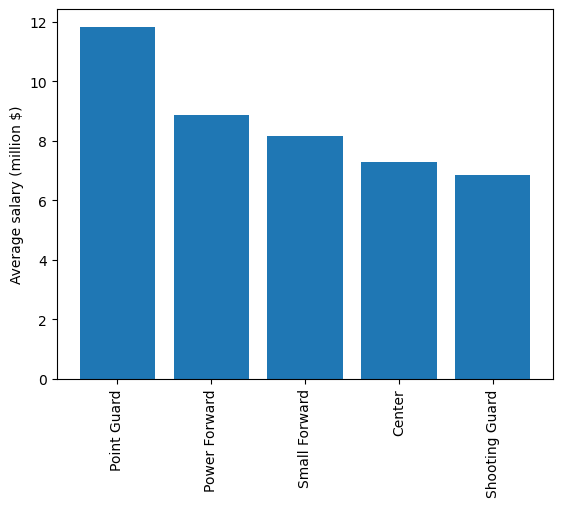

In [229]:
# Average salary for each position

position_ave_salary = (nba_improved
                   .groupby("Position Name")
                   .agg(Average_salary = ("SALARY", "mean"))
                   .sort_values("Average_salary", ascending = False)
                   .reset_index()
                  )

position_ave_salary.head(5)


# Visualize the results
plt.bar(position_ave_salary["Position Name"], position_ave_salary["Average_salary"]);
plt.xticks(rotation=90);
plt.ylabel("Average salary (million $)");

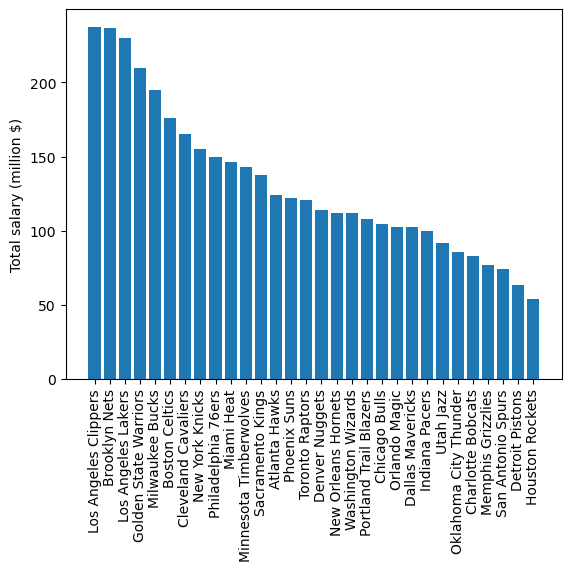

In [230]:
# Get the total salary for each team

team_tot_salary = (nba_improved
                   .groupby("TEAM")
                   .agg(Total_salary = ("SALARY", "sum"))
                   .sort_values("Total_salary", ascending = False)
                   .reset_index()
                  )

team_tot_salary.head(5)


# Visualize the results
plt.bar(team_tot_salary.TEAM, team_tot_salary.Total_salary);
plt.xticks(rotation=90);
plt.ylabel("Total salary (million $)");
